In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras, feature_column
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell


In [2]:
# 配置项
# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)


17465344/17464789 [==============================] - 10s 1us/step


In [13]:
np.max(train_data.max())
print('-------******--------')
train_data.max()

9995

-------******--------


[1,
 9995,
 2,
 7,
 2208,
 7335,
 3135,
 4173,
 3783,
 509,
 1683,
 4702,
 2,
 2,
 6,
 201,
 7,
 6415,
 687,
 2,
 2,
 7,
 6387,
 548,
 139,
 7583,
 295,
 34,
 4485,
 5302,
 2,
 2,
 2,
 7,
 2,
 2,
 146,
 24,
 1017,
 2282,
 133,
 21,
 4,
 1591,
 3113,
 786,
 2,
 16,
 125,
 4,
 2,
 9790,
 2039,
 137,
 267,
 2,
 5,
 2,
 120,
 2024,
 980,
 2,
 1248,
 5666,
 727,
 1405,
 6879,
 1060,
 6442,
 18,
 2,
 1461,
 2,
 1883,
 445,
 109,
 5369,
 3696,
 33,
 236,
 786,
 5580,
 7994,
 8,
 2,
 2,
 103,
 2,
 98,
 11,
 2,
 1461,
 24,
 66,
 351,
 1461,
 165,
 116,
 17,
 2545,
 18,
 6717,
 8694,
 5514,
 980,
 2545,
 165,
 734,
 18,
 2311,
 52,
 84,
 157,
 18,
 7232,
 11,
 661,
 8,
 607,
 3531,
 223,
 1066,
 445,
 9236,
 996,
 8,
 2898,
 4931,
 8,
 5526,
 8316,
 7880,
 154,
 378,
 459,
 18,
 6942,
 632,
 5,
 79,
 2024,
 18,
 68,
 4918,
 813,
 2456,
 2,
 17,
 840,
 4807,
 3854,
 23,
 136,
 159,
 5770,
 852,
 1698,
 632,
 7708,
 7993,
 1003,
 1372,
 5747,
 2,
 7,
 5840,
 5408,
 11,
 7200,
 120,
 4682,
 7,
 2,


In [14]:
def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [17]:
# 建立模型
model_base = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model_base.compile(optimizer='adam', 
               loss='binary_crossentropy', 
               metrics=['accuracy', 'binary_crossentropy'])
model_base.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1_history = model_base.fit(train_data, 
                            train_labels, 
                            epochs=20, 
                            batch_size=512, 
                            validation_data=(test_data, test_labels),
                            verbose=2
                           )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.4902 - accuracy: 0.8142 - binary_crossentropy: 0.4902 - val_loss: 0.3430 - val_accuracy: 0.8756 - val_binary_crossentropy: 0.3430
Epoch 2/20
25000/25000 - 3s - loss: 0.2514 - accuracy: 0.9103 - binary_crossentropy: 0.2514 - val_loss: 0.2822 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2822
Epoch 3/20
25000/25000 - 3s - loss: 0.1833 - accuracy: 0.9359 - binary_crossentropy: 0.1833 - val_loss: 0.2880 - val_accuracy: 0.8858 - val_binary_crossentropy: 0.2880
Epoch 4/20
25000/25000 - 3s - loss: 0.1459 - accuracy: 0.9503 - binary_crossentropy: 0.1459 - val_loss: 0.3100 - val_accuracy: 0.8813 - val_binary_crossentropy: 0.3100
Epoch 5/20
25000/25000 - 3s - loss: 0.1206 - accuracy: 0.9601 - binary_crossentropy: 0.1206 - val_loss: 0.3378 - val_accuracy: 0.8766 - val_binary_crossentropy: 0.3378
Epoch 6/20
25000/25000 - 2s - loss: 0.1012 - accuracy: 0.9682 - binary_crossentropy: 0.1012 - val_loss: 0.3764

In [20]:
# 欠拟合
model_small = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1)
])

model_small.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['accuracy', 'binary_crossentropy'],
                   )
model_small.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_small_history = model_small.fit(train_data, 
                            train_labels, 
                            epochs=20, 
                            batch_size=512, 
                            validation_data=(test_data, test_labels),
                            verbose=2
                           )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.1860 - accuracy: 0.9395 - binary_crossentropy: 0.1860 - val_loss: 0.4159 - val_accuracy: 0.8687 - val_binary_crossentropy: 0.4159
Epoch 2/20
25000/25000 - 4s - loss: 0.1661 - accuracy: 0.9466 - binary_crossentropy: 0.1661 - val_loss: 0.4345 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.4345
Epoch 3/20
25000/25000 - 2s - loss: 0.1530 - accuracy: 0.9522 - binary_crossentropy: 0.1530 - val_loss: 0.4528 - val_accuracy: 0.8709 - val_binary_crossentropy: 0.4528
Epoch 4/20
25000/25000 - 2s - loss: 0.1435 - accuracy: 0.9568 - binary_crossentropy: 0.1435 - val_loss: 0.4770 - val_accuracy: 0.8707 - val_binary_crossentropy: 0.4770
Epoch 5/20
25000/25000 - 2s - loss: 0.1343 - accuracy: 0.9604 - binary_crossentropy: 0.1343 - val_loss: 0.4871 - val_accuracy: 0.8700 - val_binary_crossentropy: 0.4871
Epoch 6/20
25000/25000 - 3s - loss: 0.1267 - accuracy: 0.9640 - binary_crossentropy: 0.1267 - val_loss: 0.5118

In [26]:
# 过拟合
model_big = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])

model_big.compile(optimizer='adam', 
             loss='binary_crossentropy',
             metrics=['accuracy', 'binary_crossentropy'],
                   )
model_big.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_big_history = model_big.fit(train_data, 
                                  train_labels, 
                                  epochs=20, 
                                  batch_size=512, 
                                  validation_data=(test_data, test_labels),
                                  verbose=2
                                 )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 12s - loss: 0.6168 - accuracy: 0.8105 - binary_crossentropy: 0.6168 - val_loss: 0.4692 - val_accuracy: 0.8619 - val_binary_crossentropy: 0.4692
Epoch 2/20
25000/25000 - 10s - loss: 0.2658 - accuracy: 0.9296 - binary_crossentropy: 0.2658 - val_loss: 0.5105 - val_accuracy: 0.8649 - val_binary_crossentropy: 0.5105
Epoch 3/20
25000/25000 - 10s - loss: 0.1491 - accuracy: 0.9738 - binary_crossentropy: 0.1491 - val_loss: 0.7724 - val_accuracy: 0.8736 - val_binary_crossentropy: 0.7724
Epoch 4/20
25000/25000 - 9s - loss: 0.0991 - accuracy: 0.9918 - binary_crossentropy: 0.0991 - val_loss: 0.9555 - val_accuracy: 0.8714 - val_binary_crossentropy: 0.9555
Epoch 5/20
25000/25000 - 11s - loss: 0.0884 - accuracy: 0.9942 - binary_crossentropy: 0.0884 - val_loss: 0.9997 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.9997
Epoch 6/20
25000/25000 - 9s - loss: 0.0856 - accuracy: 0.9943 - binary_crossentropy: 0.0856 - val_loss: 1.

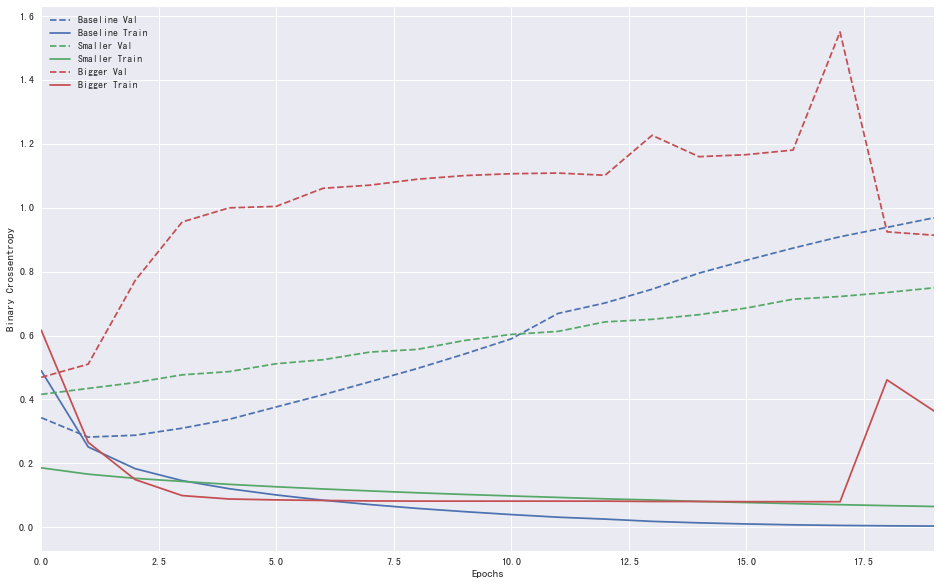

In [29]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', model1_history),
              ('smaller', model_small_history),
              ('bigger', model_big_history)])

In [32]:
# 增加正则项来防止过拟合
l2_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1)
])
l2_model.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy', 'binary_crossentropy'],
                )

l2_model_history = l2_model.fit(train_data, 
             train_labels, 
             epochs=20, 
             batch_size=512, 
             validation_data=(test_data, test_labels),
             verbose=2,
            )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 1.3096 - accuracy: 0.5882 - binary_crossentropy: 0.9907 - val_loss: 0.8534 - val_accuracy: 0.6646 - val_binary_crossentropy: 0.5790
Epoch 2/20
25000/25000 - 3s - loss: 0.7120 - accuracy: 0.7887 - binary_crossentropy: 0.4503 - val_loss: 0.6693 - val_accuracy: 0.8207 - val_binary_crossentropy: 0.4206
Epoch 3/20
25000/25000 - 3s - loss: 0.5745 - accuracy: 0.8734 - binary_crossentropy: 0.3320 - val_loss: 0.6118 - val_accuracy: 0.8667 - val_binary_crossentropy: 0.3788
Epoch 4/20
25000/25000 - 3s - loss: 0.5195 - accuracy: 0.8967 - binary_crossentropy: 0.2930 - val_loss: 0.6030 - val_accuracy: 0.8724 - val_binary_crossentropy: 0.3854
Epoch 5/20
25000/25000 - 2s - loss: 0.4792 - accuracy: 0.9072 - binary_crossentropy: 0.2680 - val_loss: 0.5902 - val_accuracy: 0.8771 - val_binary_crossentropy: 0.3867
Epoch 6/20
25000/25000 - 2s - loss: 0.5542 - accuracy: 0.8930 - binary_crossentropy: 0.3547 - val_loss: 1.3220

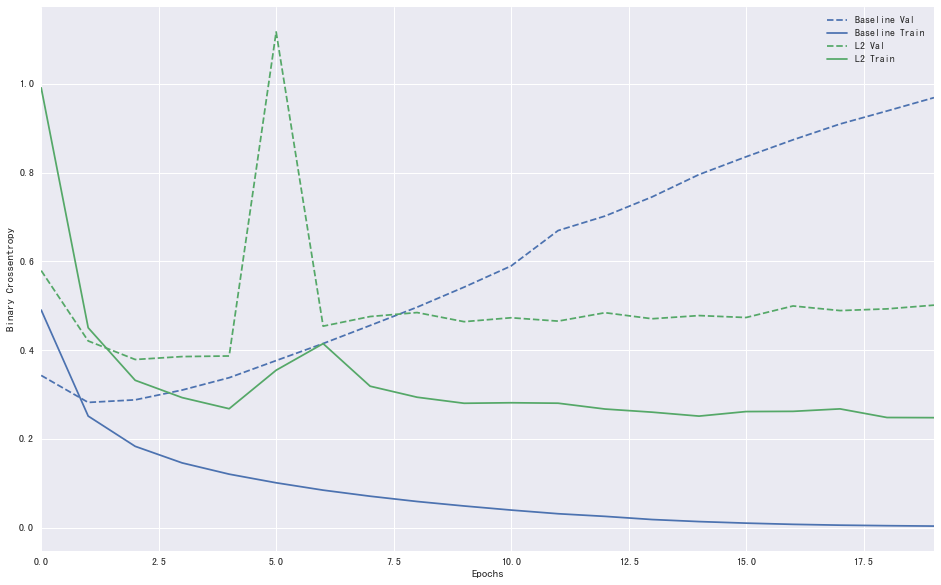

In [33]:
# 由下图可以看出 过拟合问题确实好很多
plot_history([('baseline', model1_history),
              ('l2', l2_model_history)])

In [34]:
# drop out 处理过拟合
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
])

dpt_model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy','binary_crossentropy']
                 )
dpt_history = dpt_model.fit(train_data, 
                            train_labels, 
                            epochs=20,
                            batch_size=512,
                            validation_data=(test_data, test_labels),
                            verbose=2
                           )

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6056 - accuracy: 0.6631 - binary_crossentropy: 0.6056 - val_loss: 0.4546 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.4546
Epoch 2/20
25000/25000 - 4s - loss: 0.4341 - accuracy: 0.8175 - binary_crossentropy: 0.4341 - val_loss: 0.3220 - val_accuracy: 0.8819 - val_binary_crossentropy: 0.3220
Epoch 3/20
25000/25000 - 3s - loss: 0.3368 - accuracy: 0.8754 - binary_crossentropy: 0.3368 - val_loss: 0.2809 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2809
Epoch 4/20
25000/25000 - 3s - loss: 0.2749 - accuracy: 0.9044 - binary_crossentropy: 0.2749 - val_loss: 0.2747 - val_accuracy: 0.8882 - val_binary_crossentropy: 0.2747
Epoch 5/20
25000/25000 - 2s - loss: 0.2276 - accuracy: 0.9221 - binary_crossentropy: 0.2276 - val_loss: 0.2810 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2810
Epoch 6/20
25000/25000 - 3s - loss: 0.1913 - accuracy: 0.9381 - binary_crossentropy: 0.1913 - val_loss: 0.2936

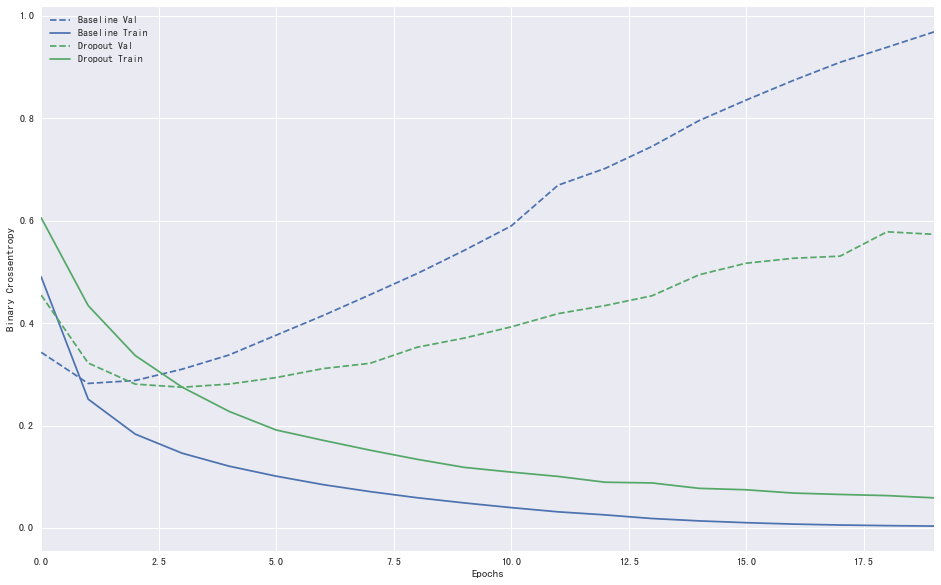

In [36]:
plot_history([('baseline', model1_history),
              ('dropout', dpt_history)])